# Sequence motif figures
The code in this notebook is used to generate figures about sequence motifs for chapter 2

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from collections import Counter

In [2]:
msa_list = [
    'ACGTGCA',
    'ACGTGGA',
    'A-GTGGA',
    'ACCTGCA',
    'ACC-CGT'
]

colors = {
    'A':'#ED1C24', # red
    'C':'#00AEEF', # blue
    'G':'#FBB040', # yellow
    'T':'#00A651', # green
    '-':'#939598' # grey
}
indices = {'A':0, 'C':1, 'G':2, 'T':3, '-':4}

msa_array = np.zeros((len(msa_list), len(msa_list[0])), dtype=int)
for i,sequence in enumerate(msa_list):
    for j, character in enumerate(sequence):
        msa_array[i,j] = indices[character]

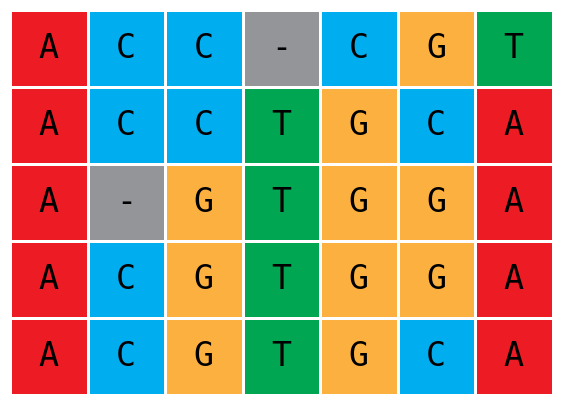

In [3]:
fig,ax = plt.subplots(1, figsize=msa_array.T.shape)

ax.pcolormesh(msa_array, cmap=ListedColormap(colors.values()), edgecolor='white', linewidth=1.)
ax.axis('off')

for i,sequence in enumerate(msa_list):
    for j, character in enumerate(sequence):
        ax.text(j+.5, i+.5, character, ha='center', va='center', fontfamily='monospace', fontsize=24)

plt.savefig('msa.pdf')

In [9]:
counter = Counter('acgtt')
counter.most_common()[0][0]

't'

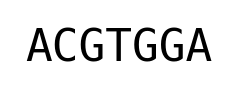

In [11]:
consensus = ''
for j in range(len(msa_list[0])):
    col_chars = [msa_list[i][j] for i in range(len(msa_list))]
    counter = Counter(col_chars)
    most_common = counter.most_common()[0][0]
    consensus += most_common
fig,ax = plt.subplots(1, figsize=(len(consensus) / 2.5, 1))
ax.text(.5,.5, consensus, va='center', ha='center', fontfamily='monospace',fontsize=32)
ax.axis('off')
plt.savefig('consensus.pdf')

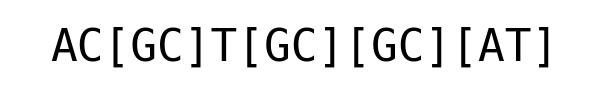

In [140]:
pattern = ''
for j in range(len(msa_list[0])):
    col_chars = [msa_list[i][j] for i in range(len(msa_list))]
    unique_chars = list(set(col_chars))
    if '-' in unique_chars:
        unique_chars.remove('-')
    if len(unique_chars) == 1:
        pattern += col_chars[0]
    else:
        pattern += f'[{"".join(unique_chars)}]'
fig,ax = plt.subplots(1, figsize=(len(pattern) / 2.5, 1))
ax.text(.5,.5, pattern, va='center', ha='center', fontfamily='monospace',fontsize=32)
ax.axis('off')
plt.savefig('pattern.pdf')

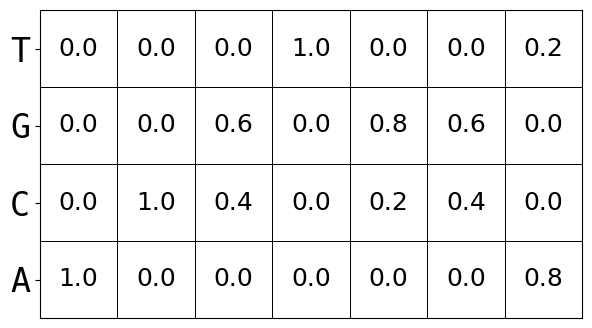

In [118]:
pssm = []
for j in range(len(msa_list[0])):
    col_chars = [msa_list[i][j] for i in range(len(msa_list))]
    non_gap = [c for c in col_chars if c != '-']
    counter = Counter()
    for s in 'ACGT':
        counter[s] = 0
    counter.update(non_gap)
    pssm.append([counter[s] / counter.total() for s in 'ACGT'])

pssm = np.round(np.array(pssm).T, 2)

fig,ax = plt.subplots(1, figsize=pssm.T.shape)
ax.pcolormesh(np.zeros(pssm.shape, dtype=int), cmap=ListedColormap(['white']), edgecolor='black', linewidth=.5)
ax.set_yticks([0.5, 1.5, 2.5, 3.5])
ax.set_yticklabels(['A','C','G','T'], fontsize=24, fontfamily='monospace')
ax.set_xticks(())

for i in range(pssm.shape[1]):
    for j in range(pssm.shape[0]):
        ax.text(i+.5,j+.5,pssm[j,i], ha='center', va='center', fontsize=18)
plt.savefig('pssm.pdf')

In [113]:
logo = np.round(pssm * np.log2(pssm / 0.25), 2)
logo[np.isnan(logo)] = 0
for i in range(logo.shape[1]):
    pos = logo[:,i]
    order = np.argsort(pos)
    print(pos)

[2. 0. 0. 0.]
[0. 2. 0. 0.]
[0.   0.27 0.76 0.  ]
[0. 0. 0. 2.]
[ 0.   -0.06  1.34  0.  ]
[0.   0.27 0.76 0.  ]
[ 1.34  0.    0.   -0.06]


/var/folders/8s/ymk92z8x4cb3wb1qbzb0k5v00000gn/T/ipykernel_98663/3791535021.py:1: RuntimeWarning: divide by zero encountered in log2
  logo = np.round(pssm * np.log2(pssm / 0.25), 2)
/var/folders/8s/ymk92z8x4cb3wb1qbzb0k5v00000gn/T/ipykernel_98663/3791535021.py:1: RuntimeWarning: invalid value encountered in multiply
  logo = np.round(pssm * np.log2(pssm / 0.25), 2)


In [114]:
np.abs(logo)

array([[2.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.34],
       [0.  , 2.  , 0.27, 0.  , 0.06, 0.27, 0.  ],
       [0.  , 0.  , 0.76, 0.  , 1.34, 0.76, 0.  ],
       [0.  , 0.  , 0.  , 2.  , 0.  , 0.  , 0.06]])

In [115]:
logo

array([[ 2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.34],
       [ 0.  ,  2.  ,  0.27,  0.  , -0.06,  0.27,  0.  ],
       [ 0.  ,  0.  ,  0.76,  0.  ,  1.34,  0.76,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  2.  ,  0.  ,  0.  , -0.06]])